# Notebook 5: Sentiment Analysis

## Introduction

This notebook takes the speech transcripts that were scraped and cleaned in Notebooks 1-3, and runs them through the VADER Sentiment Analysis Tool.

In [1]:
import pickle
import pandas as pd
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
import datetime

In [2]:
with open('../data/combined.pickle','rb') as read_file:
    ny = pickle.load(read_file)

## Sentiment Analysis

I've imported the SentimentIntensityAnalyzer above, and now I can feed the speech transcripts into it to get back sentiment scores. VADER returns a negative, neutral positive, and compound score, which can be plotted over time to understand how the speech sentiments have changed.

In [3]:
analyzer = SentimentIntensityAnalyzer()
scores = []
for i in ny['monologue']:
    scores.append(analyzer.polarity_scores(i))

In [4]:
ny_docs_sentiment = pd.concat([ny.loc[:, ['speaker', 'date']], pd.DataFrame(scores)], axis = 1)

### Rolling Sentiment Averages

I calculated rolling sentiment averages for each speaker, looking at both compound and positive score. 

In [7]:
cuomo_roll = ny_docs_sentiment[ny_docs_sentiment.speaker == 'cuomo'].sort_values(by = 'date')
de_blasio_roll = ny_docs_sentiment[ny_docs_sentiment.speaker == 'de blasio'].sort_values(by = 'date')

In [8]:
cuomo_roll['cp_roll_avg'] = cuomo_roll.compound.rolling(window = 7).mean()
cuomo_roll['pos_roll_avg'] = cuomo_roll.pos.rolling(window = 7).mean()
de_blasio_roll['cp_roll_avg'] = de_blasio_roll.compound.rolling(window = 7).mean()
de_blasio_roll['pos_roll_avg'] = de_blasio_roll.pos.rolling(window = 7).mean()

In [9]:
combined_roll = pd.concat([cuomo_roll, de_blasio_roll]).sort_values('date').reset_index(drop = True)

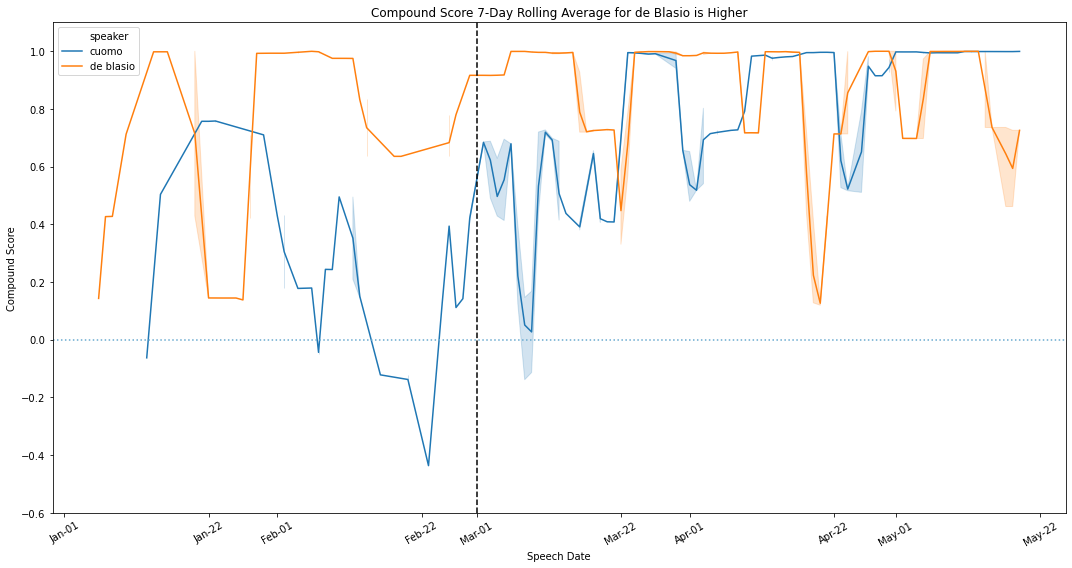

In [11]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()
sns.lineplot(x = 'date', y = 'cp_roll_avg', hue = 'speaker', data = combined_roll)
plt.title('Compound Score 7-Day Rolling Average for de Blasio is Higher')
plt.xlabel('Speech Date')
plt.ylabel('Compound Score')
plt.ylim((-0.6, 1.1))
#plt.xlim([datetime.date(2020, 3, 1), datetime.date(2020, 5, 19)])
plt.axhline(y = 0, color = '#67a9cf', linestyle = ':')
plt.axvline(x = datetime.date(2020, 3, 1), color = 'black', linestyle = 'dashed')
myFmt = dates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt);
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('compound_rolling.pdf');

Looking at the plot of compound score, the 7-day rolling average is higher for Mayor de Blasio than for Governor Cuomo. It's interesting to note that the most negative speeches by Governor Cuomo happened before the first case of Covid-19 in New York State, which happened on March 1st. Include some excerpts from that speech here. 

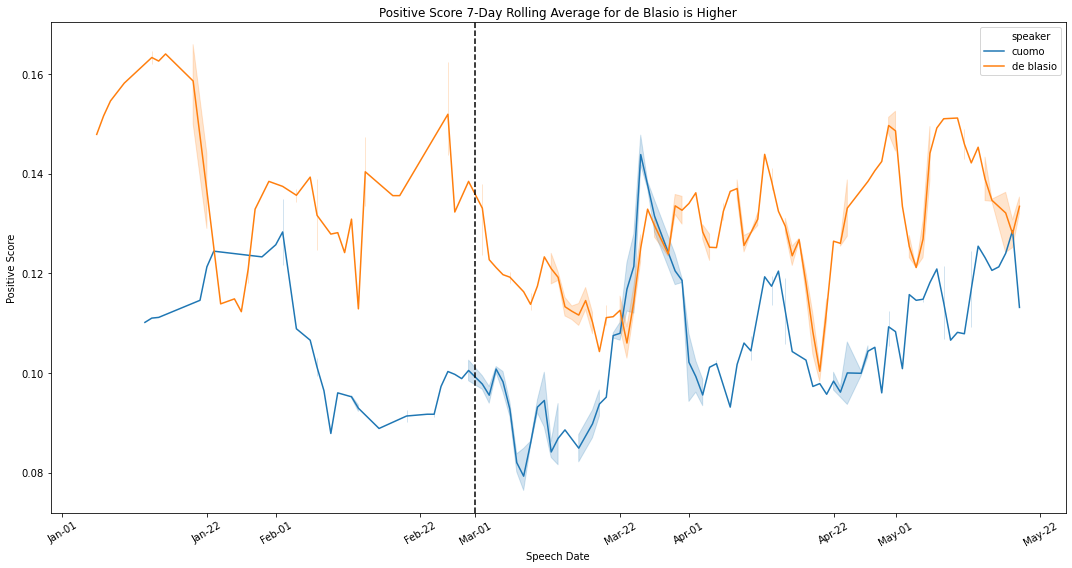

In [13]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()
sns.lineplot(x = 'date', y = 'pos_roll_avg', hue = 'speaker', data = combined_roll)
plt.title('Positive Score 7-Day Rolling Average for de Blasio is Higher')
plt.xlabel('Speech Date')
plt.ylabel('Positive Score')
plt.axvline(x = datetime.date(2020, 3, 1), color = 'black', linestyle = 'dashed')
myFmt = dates.DateFormatter('%b-%d')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=30);
plt.tight_layout()
plt.savefig('positive_rolling.pdf')

Looking at the plot of positive score, the 7-day rolling average is also higher for Mayor de Blasio than for Governor Cuomo. There is a positive peak for both Governor Cuomo and Mayor de Blasio that happens around March 22nd. Include excerpt here. 